In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import matplotlib
import math

# Question 1a

The purpose of the following code is to implement the tridiagonal matrix solver as taught in lecture, first by performing $LU$ decomposition ($A=LU$), where the lower-triangular matrix $L$ has ones along the main diagonal, then applying forwards substitution to solve for $y$ in the equation $Ly=b$, where $y=Ux$, then to solve for $x$ in the equation $y=Ux$ to find the solution to the equation $Ax=b$. The function takes in 2 inputs, the input matrix $A$, and the vector of solutions $b$. 

In [2]:
def tridiagonal_solver(A, b):
    m_list = [A[0][0]]
    l_list = []
    t_list = []
    y_list = [b[0]]
    for j in range(len(A)-1):
        t_list.append(A[j][j+1])
    for j in range(1, len(A)):
        l_list.append(A[j][j-1]/m_list[j-1])
        m_list.append(A[j][j] - (l_list[j-1]*A[j-1][j]))
    for i in range(1, len(A)):
        y_i = b[i] - l_list[i-1]*y_list[-1] 
        y_list.append(y_i)
    x_list = [((y_list[-1])/(m_list[-1]))]
    for i in range(1, len(A)):
        x_i = ((y_list[len(A)-(i+1)] - (t_list[len(A)-(i+1)]*x_list[-1])) / m_list[len(A)-(i+1)])
        x_list.append(x_i)
    return np.array(list(reversed(x_list)))

# Question 1b

The purpose of the following code is to test the implementation of the tridiagonal_solver function with the following example tridiagonal matrix $A$ and vector $b$, then check the resultant solution against numpy's built-in matrix equation solver.

In [3]:
x = [1, 2, 3, 4]

In [4]:
A = [[1,48,0,0],[3,0.0000004,1,0],[0,2,3,4],[0,0,1,6]]

In [5]:
print(A)

[[1, 48, 0, 0], [3, 4e-07, 1, 0], [0, 2, 3, 4], [0, 0, 1, 6]]


In [6]:
b = np.matmul(A, x)

In [7]:
print(b)

[97.         6.0000008 29.        27.       ]


In [8]:
tridiagonal_solver(A, b)

array([1., 2., 3., 4.])

In [9]:
np.linalg.solve(A, b)

array([1., 2., 3., 4.])

# Question 2a

The purpose of the function tridiagonal_creator is to create a tridiagonal matrix of the form $A = \frac{1}{h^2} \cdot$ $\begin{pmatrix}
2+c_1h^2 & -1 & 0 & ... & 0\\
-1 & 2+c_2h^2 & -1 & ... & 0\\
.\\
.\\
.\\
0 & ... & 0 & -1 & 2+c_Nh^2\\
\end{pmatrix}$
$\newline$
where $c_j = \pi^2$ for all $j$. The function takes in the input $N$, the size of the matrix.

In [10]:
def tridiagonal_creator(N):
    h = 1/N
    A = np.zeros((N,N))
    for j in range(N):
        if (j == 0):
            A[0][0] = 2+(h**2)*(math.pi**2)
            A[0][1] = -1
        elif (j == N-1):
            A[N-1][N-2] = -1
            A[N-1][N-1] = 2+(h**2)*(math.pi**2)
        else:
            A[j][j-1] = -1
            A[j][j] = 2+((h**2)*(math.pi**2))
            A[j][j+1] = -1
    A = np.array(A)*(1/h**2)
    return A

In [11]:
A = tridiagonal_creator(50)
print(A)

[[ 5009.8696044 -2500.            0.        ...     0.
      0.            0.       ]
 [-2500.         5009.8696044 -2500.        ...     0.
      0.            0.       ]
 [    0.        -2500.         5009.8696044 ...     0.
      0.            0.       ]
 ...
 [    0.            0.            0.        ...  5009.8696044
  -2500.            0.       ]
 [    0.            0.            0.        ... -2500.
   5009.8696044 -2500.       ]
 [    0.            0.            0.        ...     0.
  -2500.         5009.8696044]]


The following function x_creator creates a list of equally spaced nodes $x_j$, given input parameter $N$ (number of nodes).

In [12]:
def x_creator(N):
    x_list = []
    h = 1/N
    for j in range(N):
        x_list.append(j*h)
    return x_list

The following function f_creator evaluates a given function $f$ at each node given by the input x_list, generated by x_creator function. Here $f(x_j) = 2\pi^2\sin(\pi x_j)$.

In [13]:
def f_creator(x_list):
    f_list = []
    for j in range(len(x_list)):
        f_list.append((2*math.pi**2)*math.sin(math.pi*x_list[j]))
    return f_list

In [14]:
x_list = x_creator(50)

In [15]:
print((x_list))

[0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7000000000000001, 0.72, 0.74, 0.76, 0.78, 0.8, 0.8200000000000001, 0.84, 0.86, 0.88, 0.9, 0.92, 0.9400000000000001, 0.96, 0.98]


In [16]:
f_list = f_creator(x_list[1:])

Now let's hardcode in the specified boundary values: $u(0) = u(1) = 0$

In [17]:
x_list.append(1.0)

In [18]:
f_list.append(0)
f_list.insert(0,0)

In [19]:
print(f_list)
print(len(f_list))

[0, 1.239435175786397, 2.4739788671780354, 3.698758894234354, 4.908941609737333, 6.099750975388773, 7.2664874106514965, 8.404546339846702, 9.509436364310515, 10.576796987892621, 11.602415825842423, 12.58224522916721, 13.512418258853536, 14.389263946908864, 15.209321783995126, 15.96935537647813, 16.66636521899467, 17.29760053212984, 17.860570118486677, 18.353052194304166, 18.77310315782272, 19.11906525979236, 19.38957314585166, 19.583559244957648, 19.700257982600966, 19.739208802178716, 19.700257982600966, 19.583559244957648, 19.38957314585166, 19.11906525979236, 18.77310315782272, 18.35305219430417, 17.860570118486674, 17.297600532129838, 16.66636521899467, 15.96935537647813, 15.209321783995126, 14.389263946908862, 13.51241825885354, 12.582245229167214, 11.602415825842424, 10.576796987892621, 9.50943636431052, 8.404546339846705, 7.266487410651501, 6.099750975388774, 4.908941609737334, 3.6987588942343534, 2.473978867178041, 1.2394351757864013, 0]
51


The following function true_f_creator has the same purpose as f_creator, except here our function $f$ is the actual solution to our BVP, $f(x_j) = \sin(\pi x_j)$.

In [20]:
def true_f_creator(x_list):
    f_list = []
    for j in range(len(x_list)):
        f_list.append(math.sin(math.pi*x_list[j]))
    return f_list   

In [21]:
real_f_list = true_f_creator(x_list)

In [22]:
len(x_list)

51

In [23]:
A = tridiagonal_creator(49)

In [24]:
approx_list = tridiagonal_solver(A, f_list[1:len(f_list)-1])

In [25]:
approx_list

array([0.06406921, 0.12788557, 0.19119722, 0.25375431, 0.31530994,
       0.37562118, 0.43445003, 0.49156429, 0.54673858, 0.59975514,
       0.65040474, 0.69848749, 0.74381363, 0.78620428, 0.82549213,
       0.86152215, 0.89415213, 0.9232533 , 0.94871082, 0.9704242 ,
       0.98830777, 1.00229093, 1.01231851, 1.01835093, 1.02036439,
       1.01835093, 1.01231851, 1.00229093, 0.98830777, 0.9704242 ,
       0.94871082, 0.9232533 , 0.89415213, 0.86152215, 0.82549213,
       0.78620428, 0.74381363, 0.69848749, 0.65040474, 0.59975514,
       0.54673858, 0.49156429, 0.43445003, 0.37562118, 0.31530994,
       0.25375431, 0.19119722, 0.12788557, 0.06406921])

In [26]:
approx_list = np.append(approx_list, 0)
approx_list = np.insert(approx_list, 0, 0)

In [27]:
print(len(approx_list))

51


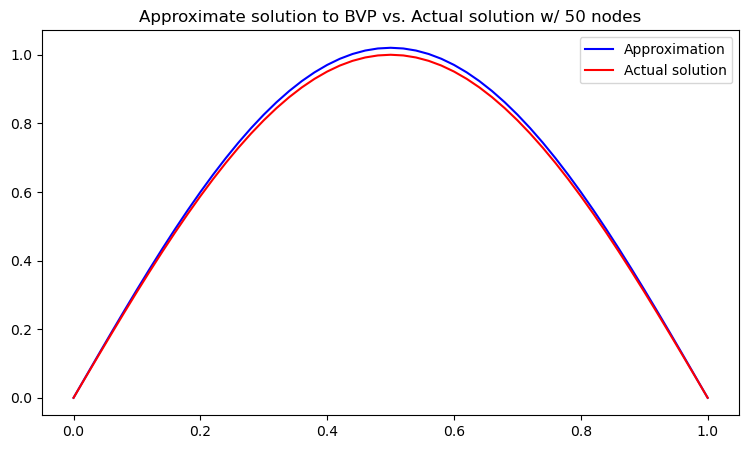

In [28]:
plt.figure(figsize=(9,5))
plt.plot(np.linspace(0, 1, 51), approx_list, "-b", label='Approximation')
plt.plot(np.linspace(0, 1, 51), real_f_list, "-r", label='Actual solution')
plt.title('Approximate solution to BVP vs. Actual solution w/ 50 nodes')
plt.legend()

# Question 2b

We can verify that $u(x) = \sin(\pi x)$ is a valid solution: $\newline$
$u(0) = \sin(0) = \sin(\pi) = u(1) \newline$
$-u''(x) = \pi^2sin(\pi x) = \pi^2u(x) \newline$ 
Therefore, $-u''(x) + \pi^2u(x) = 2\pi^2u(x) = 2\pi^2sin(\pi x)$ for $x \in [0, 1]$

# Question 2c

The following function l2_error computes the square root of the sum of squared differences between our actual solution and our approximation. Its input parameters are the vector of approximate solutions found by solving the matrix equation $Ax=b$ using our tridiagonal solver, and the vector of actual solutions created by evaluating our actual solution $f(x) = \sin(\pi x)$ at every node in our list of nodes.

In [29]:
def l2_error(real, approx):
    error_list = []
    for i, val in enumerate(real):
        error_list.append((val - approx[i])**2)
    return math.sqrt(sum(error_list))

In [30]:
l2_error(real_f_list, approx_list)

0.10182195170496333

In [31]:
x_list2 = x_creator(100)

In [32]:
f_list2 = f_creator(x_list2[1:])

In [33]:
x_list2.append(1.0)
f_list2.append(0)
f_list2.insert(0,0)

In [34]:
print(f_list2)

[0, 0.620023532078105, 1.239435175786397, 1.8576236466150102, 2.4739788671780354, 3.087892569286244, 3.698758894234354, 4.305974990710429, 4.908941609737333, 5.50706369605913, 6.099750975388773, 6.686418536937567, 7.2664874106514965, 7.839385138584771, 8.404546339846702, 8.961413268564375, 9.509436364310515, 10.048074794453244, 10.576796987892621, 11.095081159657122, 11.602415825842423, 12.098300308384253, 12.58224522916721, 13.053772992981854, 13.512418258853536, 13.957728399277759, 14.389263946908864, 14.80659902826126, 15.209321783995126, 15.597034775371858, 15.96935537647813, 16.325916151831457, 16.66636521899467, 16.990366595841394, 17.29760053212984, 17.587763825057692, 17.860570118486677, 18.115750185541472, 18.353052194304166, 18.572241956341927, 18.77310315782272, 18.955437572990956, 19.11906525979236, 19.26382473745507, 19.38957314585166, 19.496186386484833, 19.583559244957648, 19.651605494807452, 19.700257982600966, 19.72946869420662, 19.739208802178716, 19.72946869420662, 1

In [35]:
real_f_list2 = true_f_creator(x_list2)

Repeat earlier steps while halving the mesh size. Since this algorithm is known to be $\mathcal{O(n^2)}$, we would expect the error rate to decrease by a factor of 4.

In [36]:
B = tridiagonal_creator(99)

In [37]:
approx_list2 = tridiagonal_solver(B, f_list2[1:len(f_list2)-1])

In [38]:
approx_list2 = np.append(approx_list2, 0)
approx_list2 = np.insert(approx_list2, 0, 0)

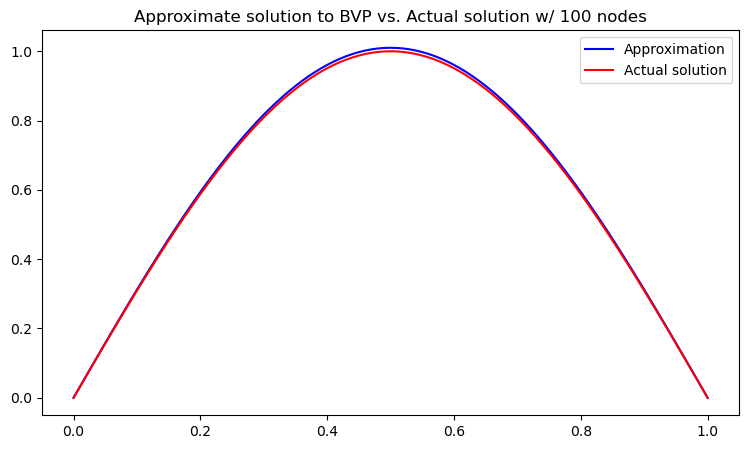

In [39]:
plt.figure(figsize=(9,5))
plt.plot(np.linspace(0, 1, 101), approx_list2, "-b", label='Approximation')
plt.plot(np.linspace(0, 1, 101), real_f_list2, "-r", label='Actual solution')
plt.title('Approximate solution to BVP vs. Actual solution w/ 100 nodes')
plt.legend()

In [40]:
l2_error(real_f_list2, approx_list2)

0.07135497256285185

So our error did not decline as much as expected. This may be because the assumptions of big-$\mathcal{O}$ do not hold under the l2 norm, or due to other confounding factors.

# Question 2d

Consider the equation $y = \frac{h - \frac{h}{2}}{\frac{h}{2} - \frac{h}{4}}$, where $h$ is our step size. If $y$ approaches $0$ after a sufficient increase in our number of nodes, we can see that our approximation is converging (to the correct solution or something else), as an increase in mesh size is no longer producing a corresponding change in the approximation. If $y$ never converges to $0$, then the algorithm diverges. $\newline$
The rate of convergence is given by, as you double the number of nodes and $h \rightarrow \frac{h}{2}$, then the corresonding error rate $E_{h}(f) \rightarrow \frac{E_{h}(f)}{2^p}$. $p$ is defined to be the rate of convergence.